# Predicting Flight Prices with  Regression

 ## 1.1. Context:
The goal of this project is to analyze the flight reservation dataset obtained from the Indian website "Easy My Trip" and conduct two processes: an Exploratory Data Analysis (EDA) and the creation of a flight price prediction model. The website is a platform for booking flights and buying tickets. Through this study, we will seek insights for those planning a trip.

###### Research Questions
The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?
d) How the price changes with change in Source and Destination?
e) How does the ticket price vary between Economy and Business class?

In [84]:
# Importing Libraries and Loading the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('Clean_Dataset.csv')

df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## 2. Data overview

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [86]:
df.shape

(300153, 12)

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


## 2.2. Data cleaning

In [88]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [89]:
df.duplicated().any().sum()
df.drop_duplicates(inplace=True)

In [90]:
df=df.drop(columns='Unnamed: 0')
df=df.drop(columns='flight')
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


###  Detect and Remove Outliers

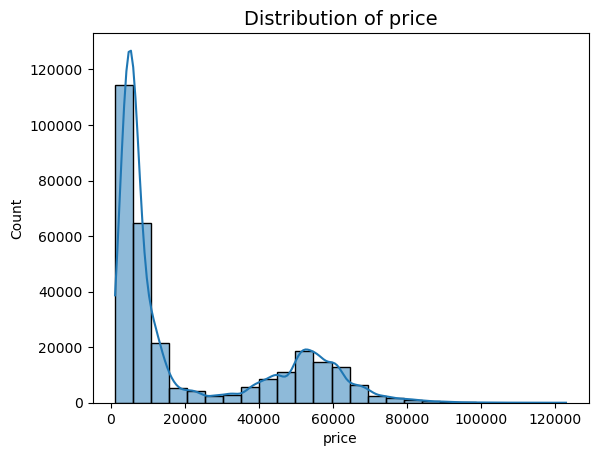

In [91]:
sns.histplot(df['price'], kde=True,bins=25)
plt.title('Distribution of price', fontsize = 14)
plt.show()

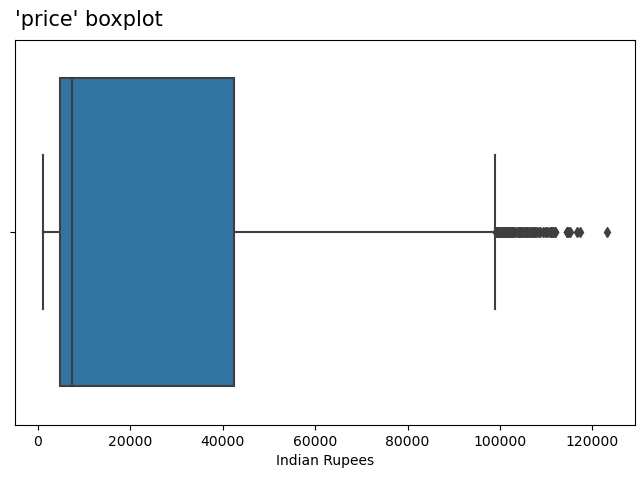

In [92]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x = df['price'])
ax.set_title("'price' boxplot", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Indian Rupees", fontsize = 10)

plt.show()

In [93]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

df = df[(df['price'] > lower) & (df['price'] < upper)].copy()
df.reset_index()
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


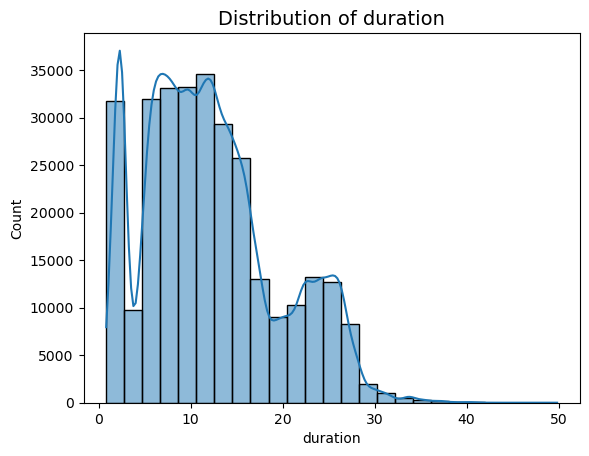

In [94]:
sns.histplot(df['duration'], kde=True,bins=25)
plt.title('Distribution of duration', fontsize = 14)
plt.show()

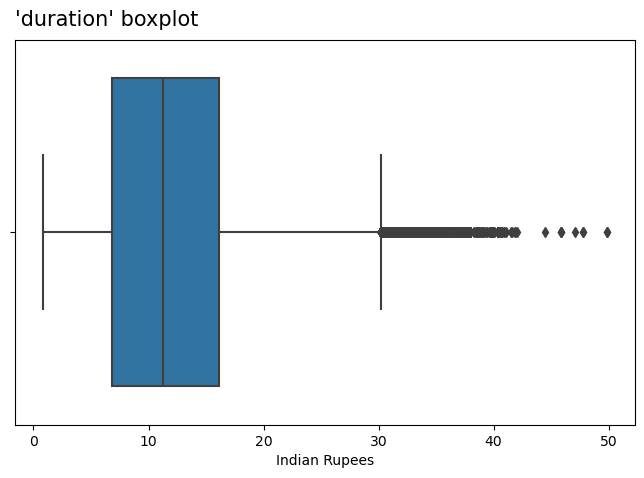

In [95]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x = df['duration'])
ax.set_title("'duration' boxplot", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Indian Rupees", fontsize = 10)

plt.show()

In [96]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

df = df[(df['duration'] > lower) & (df['duration'] < upper)].copy()
df.reset_index()
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


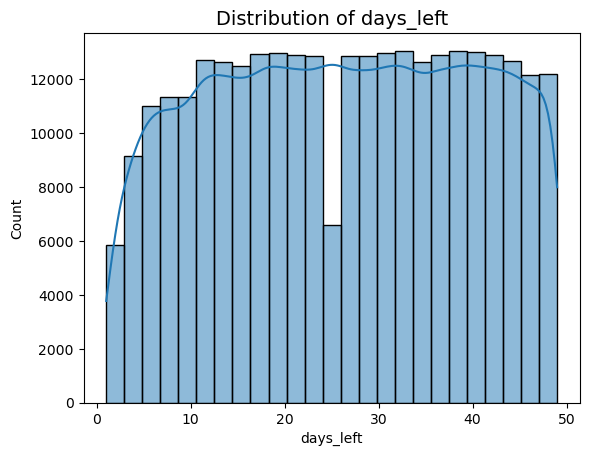

In [97]:
sns.histplot(df['days_left'], kde=True,bins=25)
plt.title('Distribution of days_left', fontsize = 14)
plt.show()

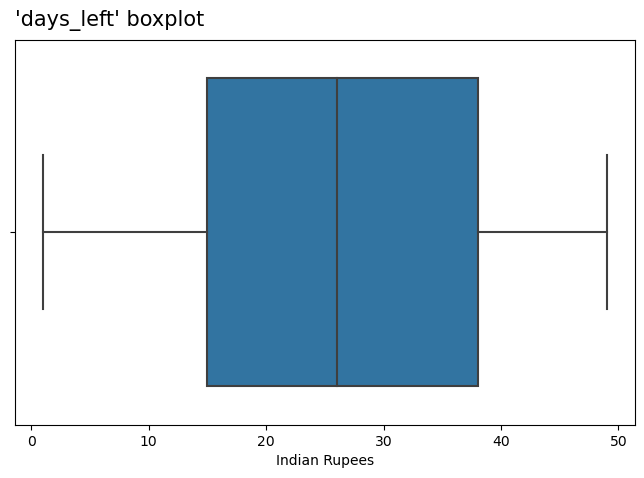

In [98]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(x = df['days_left'])
ax.set_title("'days_left' boxplot", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Indian Rupees", fontsize = 10)

plt.show()

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Bar Plot of airline')

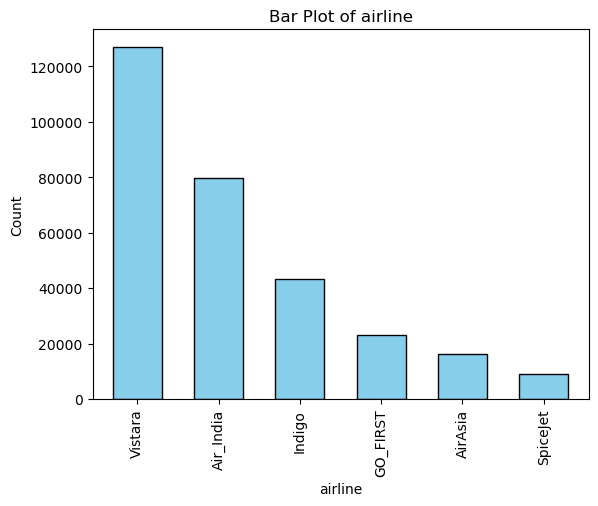

In [99]:
value_counts = df['airline'].value_counts()


value_counts.plot(kind='bar',color='skyblue', width=0.6, edgecolor='black')
plt.xlabel('airline')
plt.ylabel('Count')
plt.title('Bar Plot of airline')

Text(0.5, 1.0, 'Bar Plot of source_city')

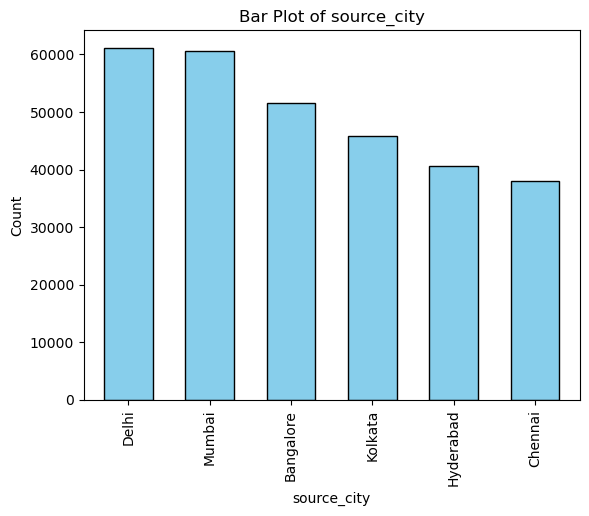

In [100]:
value_counts = df['source_city'].value_counts()


value_counts.plot(kind='bar',color='skyblue', width=0.6, edgecolor='black')
plt.xlabel('source_city')
plt.ylabel('Count')
plt.title('Bar Plot of source_city')

Text(0.5, 1.0, 'Bar Plot of destination_city')

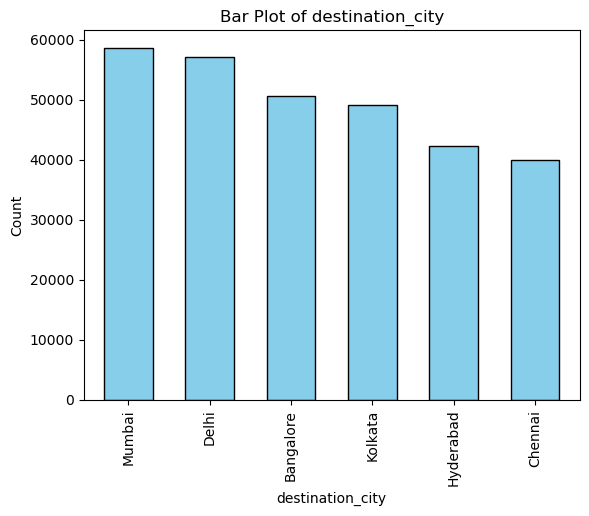

In [101]:
value_counts = df['destination_city'].value_counts()


value_counts.plot(kind='bar',color='skyblue', width=0.6, edgecolor='black')
plt.xlabel('destination_city')
plt.ylabel('Count')
plt.title('Bar Plot of destination_city')

Text(0.5, 1.0, 'Bar Plot of stops')

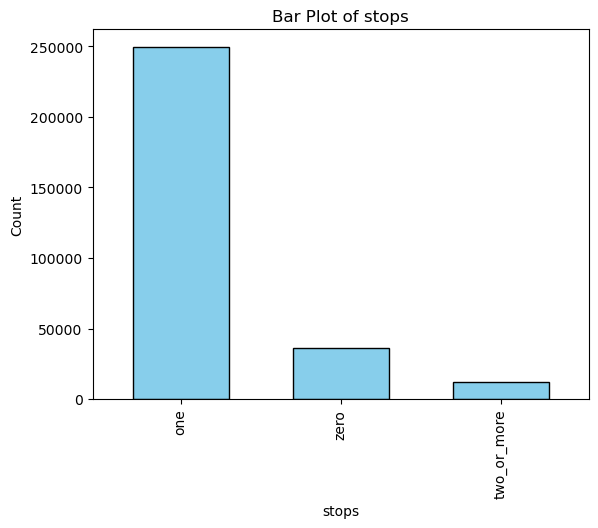

In [102]:
value_counts = df['stops'].value_counts()


value_counts.plot(kind='bar',color='skyblue', width=0.6, edgecolor='black')
plt.xlabel('stops')
plt.ylabel('Count')
plt.title('Bar Plot of stops')

Text(0.5, 1.0, 'Bar Plot of departure_time')

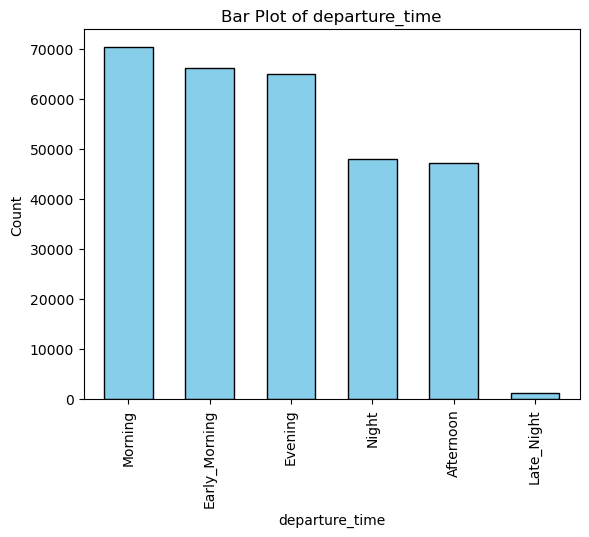

In [103]:
value_counts = df['departure_time'].value_counts()


value_counts.plot(kind='bar',color='skyblue', width=0.6, edgecolor='black')
plt.xlabel('departure_time')
plt.ylabel('Count')
plt.title('Bar Plot of departure_time')

Text(0.5, 1.0, 'Bar Plot of arrival_time')

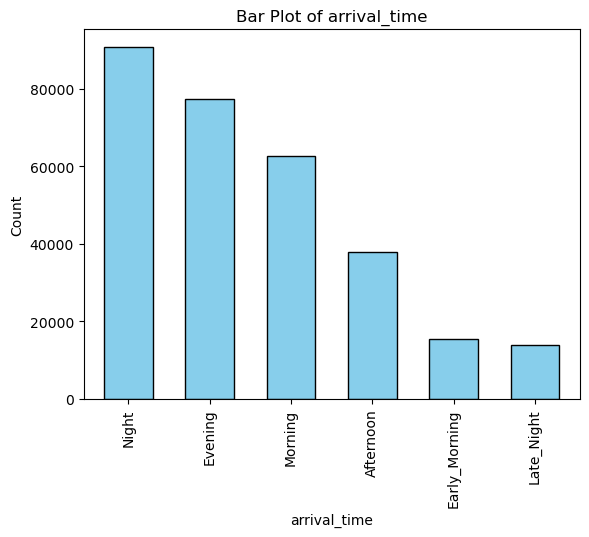

In [104]:
value_counts = df['arrival_time'].value_counts()


value_counts.plot(kind='bar',color='skyblue', width=0.6, edgecolor='black')
plt.xlabel('arrival_time')
plt.ylabel('Count')
plt.title('Bar Plot of arrival_time')

Text(0.5, 1.0, 'Pie Plot of class')

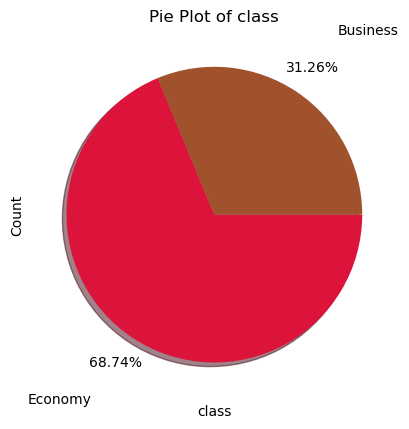

In [105]:
value_counts = df['class'].value_counts()


value_counts.plot(kind='pie',
        shadow=True,
        autopct='%1.2f%%',
        pctdistance=1.2,
        labeldistance=1.5,
        radius=1,
        colors=['crimson','sienna','orangered'],
        counterclock=False)
plt.xlabel('class')
plt.ylabel('Count')
plt.title('Pie Plot of class')

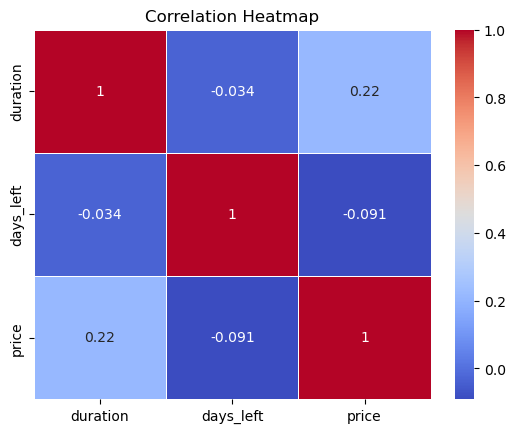

In [106]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## a) Does price vary with Airlines?

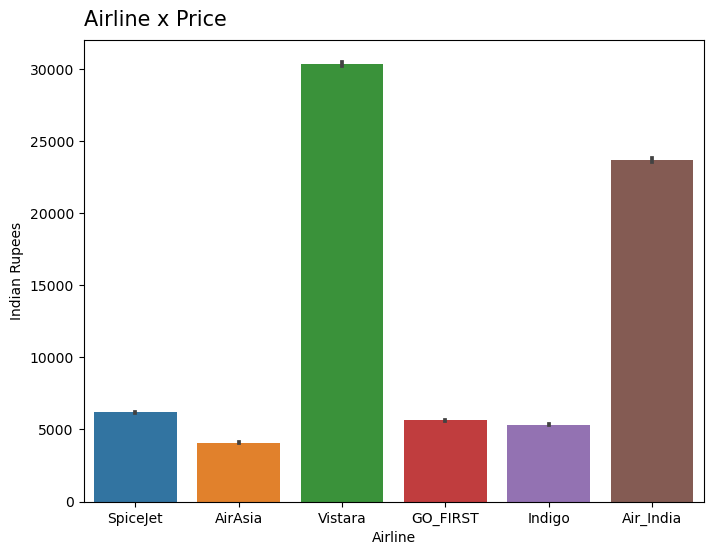

In [107]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df, x = 'airline', y = 'price')
ax.set_title("Airline x Price", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Airline", fontsize = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)

plt.show()


as we can see yes airline affects the price 

## b) How is the price affected when tickets are bought in just 1 or 2 days before departure? 

In [108]:
df['days'] = df['days_left'].apply(lambda x: 'Under 2 days' if x < 2 else 'Above 2 days')
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Under 2 days
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Under 2 days
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Under 2 days
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Under 2 days
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Under 2 days
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Above 2 days
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Above 2 days
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Above 2 days
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Above 2 days


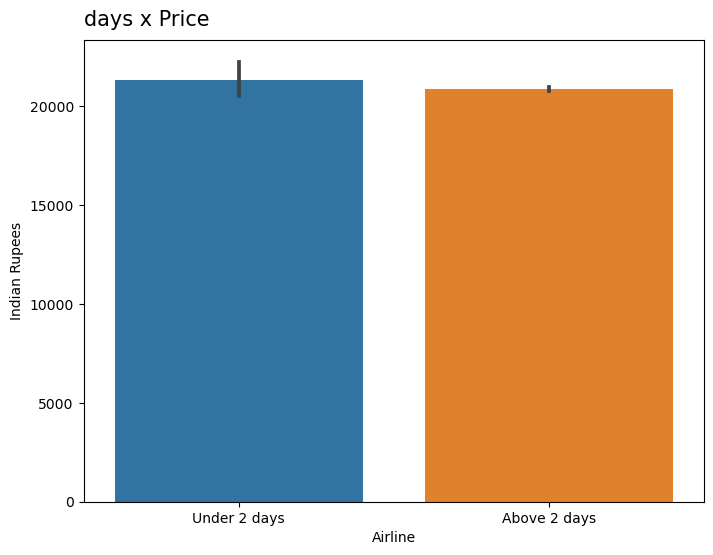

In [109]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df, x = 'days', y = 'price')
ax.set_title("days x Price", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Airline", fontsize = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)

plt.show()

Flights are generally cheaper when booked in advance

In [110]:
df=df.drop(columns='days')
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## c) Does ticket price change based on the departure time and arrival time? 

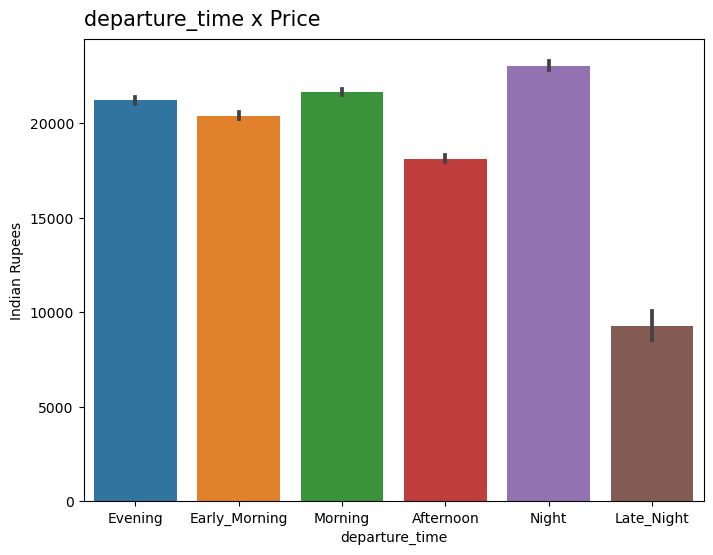

In [111]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df, x = 'departure_time', y = 'price')
ax.set_title("departure_time x Price", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("departure_time", fontsize = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)

plt.show()

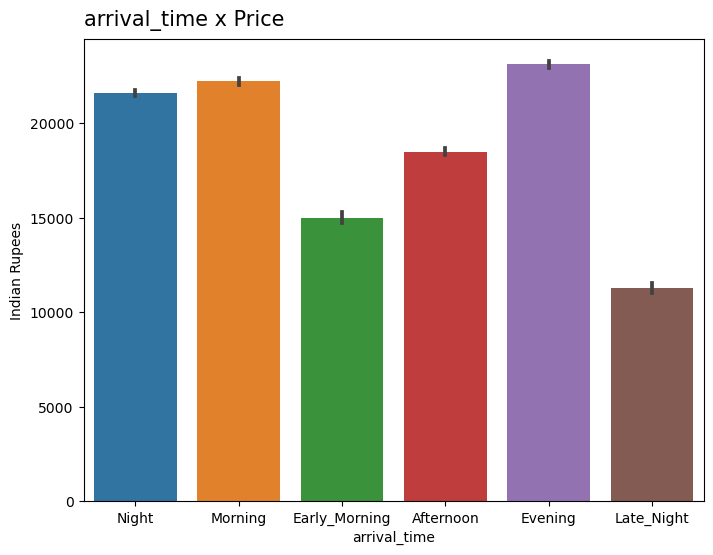

In [112]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df, x = 'arrival_time', y = 'price')
ax.set_title("arrival_time x Price", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("arrival_time", fontsize = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)

plt.show()

Late-night is  the best time to buy  flights

## d) How the price changes with change in Source and Destination?

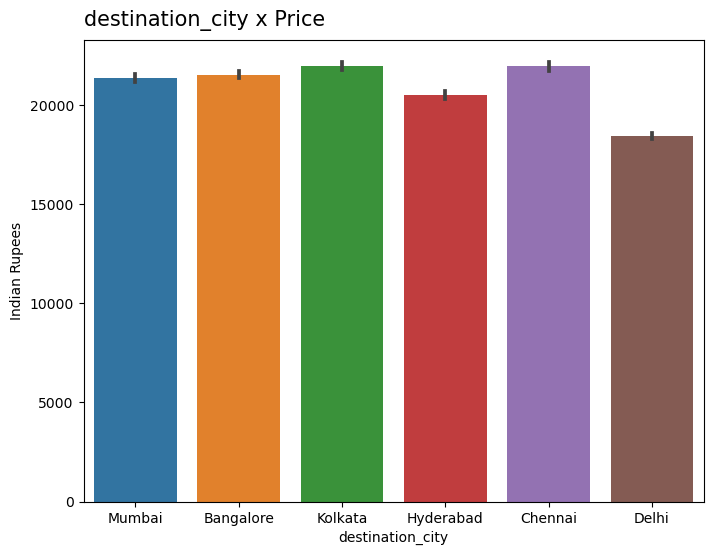

In [113]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df, x = 'destination_city', y = 'price')
ax.set_title("destination_city x Price", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("destination_city", fontsize = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)

plt.show()

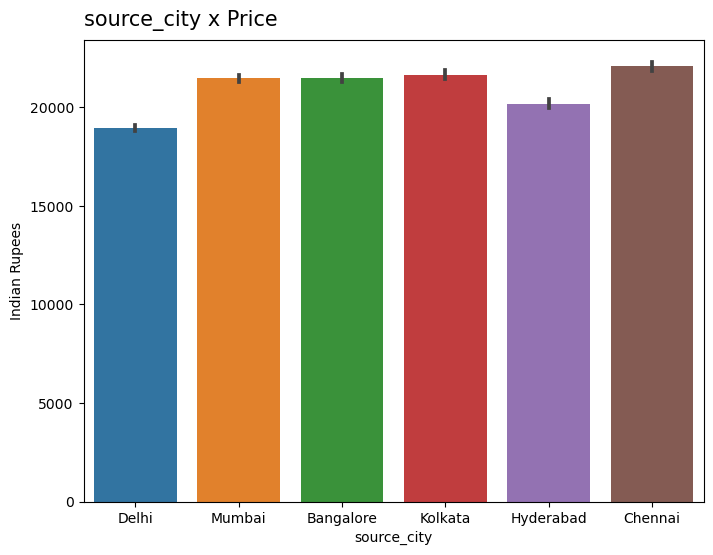

In [114]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df, x = 'source_city', y = 'price')
ax.set_title("source_city x Price", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("source_city", fontsize = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)

plt.show()

Yes, the source and destination airports significantly impact the ticket price. Delhi is the cheapest destination, followed by Hyderabad.

## e) How does the ticket price vary between Economy and Business class?

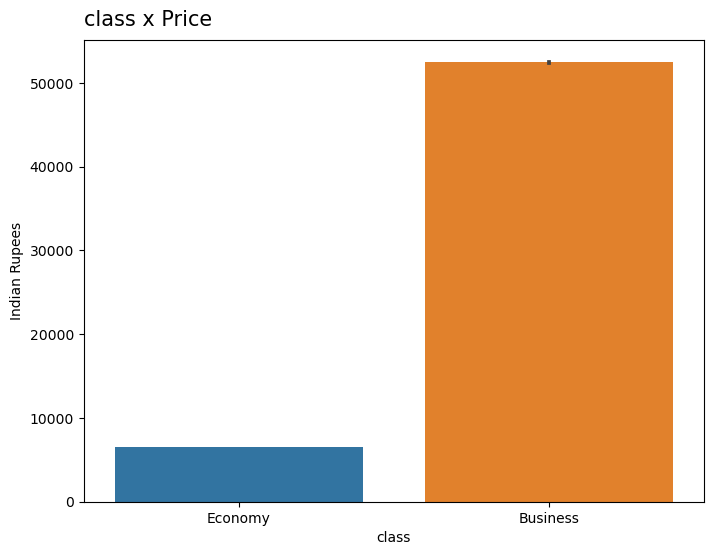

In [115]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(df, x = 'class', y = 'price')
ax.set_title("class x Price", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("class", fontsize = 10)
ax.set_ylabel("Indian Rupees", fontsize = 10)

plt.show()

as we can see yes class affects the price 

# Preprocessing

In [116]:
df['Calss']=df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [117]:
df=df.drop(columns='class')
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,Calss
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955,0
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,10.08,49,69265,1
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,10.42,49,77105,1
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,13.83,49,79099,1
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,10.00,49,81585,1


In [118]:
df['stops']=pd.factorize(df['stops'])[0]
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,Calss
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,2.17,1,5953,0
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,2.33,1,5953,0
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,2.17,1,5956,0
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,2.25,1,5955,0
4,Vistara,Delhi,Morning,0,Morning,Mumbai,2.33,1,5955,0
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,10.08,49,69265,1
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,10.42,49,77105,1
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,13.83,49,79099,1
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,10.00,49,81585,1


In [119]:
df=df.join(pd.get_dummies(df['airline'],prefix='airline')).drop(columns='airline')
df=df.join(pd.get_dummies(df['source_city'],prefix='source')).drop(columns='source_city')
df=df.join(pd.get_dummies(df['destination_city'],prefix='destination')).drop(columns='destination_city')
df=df.join(pd.get_dummies(df['arrival_time'],prefix='arrival')).drop(columns='arrival_time')
df=df.join(pd.get_dummies(df['departure_time'],prefix='departure')).drop(columns='departure_time')
df


,stops,duration,days_left,price,Calss,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,2.17,1,5953,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,2.33,1,5953,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,2.17,1,5956,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,2.25,1,5955,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.33,1,5955,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,10.08,49,69265,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,10.42,49,77105,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,13.83,49,79099,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,10.00,49,81585,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


# Training Regression Model


In [120]:
X,y=df.drop(columns='price'),df['price']
X_train ,X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [121]:
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [122]:
reg.score(X_test,y_test)

0.9857449739204274

In [123]:
import math 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=reg.predict(X_test)

print('R2:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',math.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.9857449739204274
MAE: 1062.4457058672938
MSE: 7350818.908553766
RMSE: 2711.239367623922


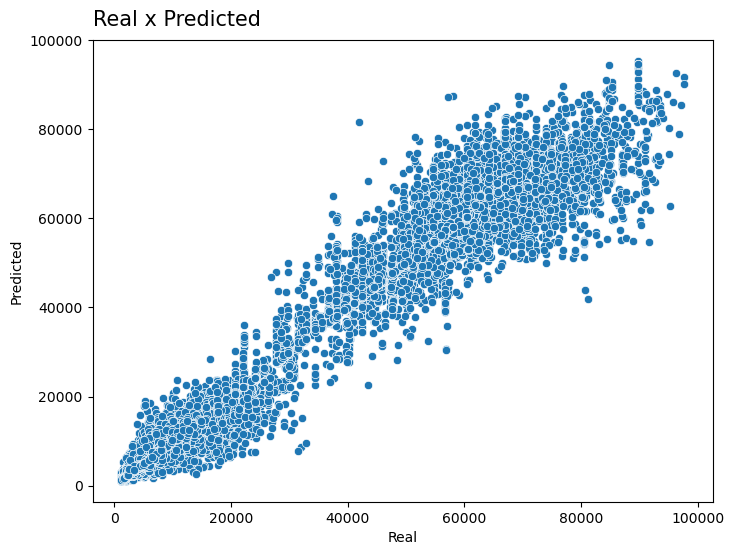

In [124]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.scatterplot(x = y_test, y = y_pred)
ax.set_title("Real x Predicted", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Real", fontsize = 10)
ax.set_ylabel("Predicted", fontsize = 10)

plt.show()